# Exploratory Data Analysis

## Imports libraries and dataframe

In [ ]:
# Install ObsPy
!pip install obspy

In [1]:
# Import Libraries
import os
import random
import obspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Make a connection with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import dataframe
df = pd.read_csv('/content/drive/MyDrive/eartquakes_records/final_earthquake_dataset.csv')
df.head()

,network,station,channel,start-time,end-time,sampling-rate,npts,date_time,earthquake_code,latitude,longitude,depth,xM,MD,ML,Ms,Mb,location
0,KO,YLVX,BHE,2002-05-01T10:45:00.004000Z,2002-05-01T10:49:59.974000Z,100.0,29998,2002-05-01 10:45:00.004,20020501104538,38.62,30.99,7,3.4,3.4,0.0,0.0,0.0,CUMHURIYET-CAY (AFYONKARAHISAR) [North East 4...
1,KO,YLVX,BHE,2002-05-04T23:26:00.004000Z,2002-05-04T23:35:59.974000Z,100.0,59998,2002-05-04 23:26:00.004,20020504232625,40.78,30.86,9,3.1,3.1,0.0,0.0,0.0,YESILYAYLA-GUMUSOVA (DUZCE) [South West 2.1 km]
2,KO,BALB,BHE,2002-05-05T09:21:00.000000Z,2002-05-05T09:31:07.980000Z,50.0,30400,2002-05-05 09:21:00.000,20020505092209,40.53,28.32,7,4.1,3.9,4.1,0.0,0.0,MARMARA DENIZI
3,KO,CTTX,BHE,2002-05-05T09:21:00.004000Z,2002-05-05T09:30:59.964000Z,100.0,59997,2002-05-05 09:21:00.004,20020505092209,40.53,28.32,7,4.1,3.9,4.1,0.0,0.0,MARMARA DENIZI
4,KO,ISKB,BHE,2002-05-05T09:20:54.000000Z,2002-05-05T09:31:01.980000Z,50.0,30400,2002-05-05 09:20:54.000,20020505092209,40.53,28.32,7,4.1,3.9,4.1,0.0,0.0,MARMARA DENIZI


## Explore dataframe

In [4]:
# How many data we have?
len(df)

1034

In [5]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   network          1034 non-null   object 
 1   station          1034 non-null   object 
 2   channel          1034 non-null   object 
 3   start-time       1034 non-null   object 
 4   end-time         1034 non-null   object 
 5   sampling-rate    1034 non-null   float64
 6   npts             1034 non-null   int64  
 7   date_time        1034 non-null   object 
 8   earthquake_code  1034 non-null   int64  
 9   latitude         1034 non-null   float64
 10  longitude        1034 non-null   float64
 11  depth            1034 non-null   int64  
 12  xM               1034 non-null   float64
 13  MD               1034 non-null   float64
 14  ML               1034 non-null   float64
 15  Ms               1034 non-null   float64
 16  Mb               1034 non-null   float64
 17  location      

In [6]:
# What is the frequency of network?
df['network'].value_counts()

KO    1034
Name: network, dtype: int64

In [7]:
# Define a function to summarize categorical features
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))

  if plot:
    sns.countplot(x=col_name, data=dataframe)
    plt.show()

      station  Ratio
YLVX      417  40.33
ISKB      293  28.34
CTTX      100   9.67
MFTX       91   8.80
MRMX       85   8.22
BALB       25   2.42
EDRB       23   2.22


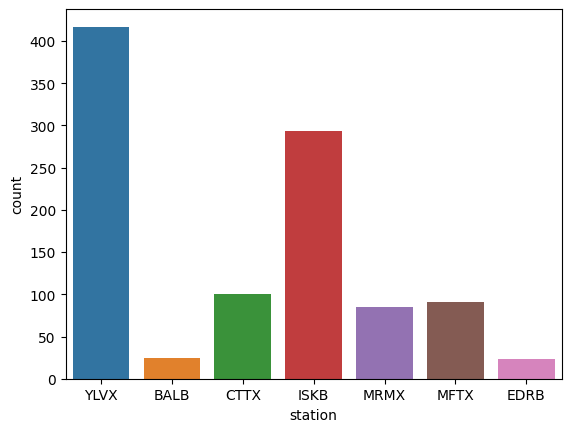

In [8]:
# Summary stations
cat_summary(df, 'station', plot=True)

       sampling-rate  Ratio
100.0            693  67.02
50.0             341  32.98


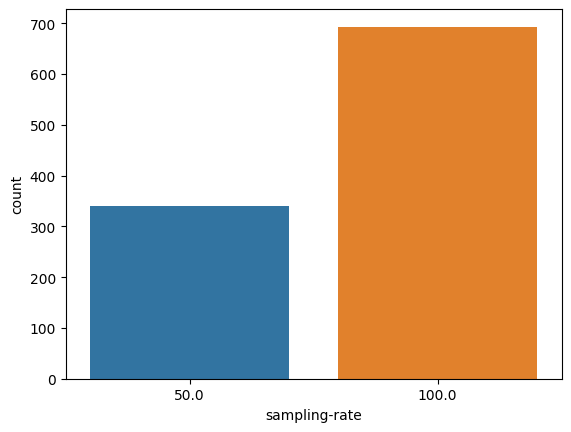

In [9]:
# Summary sampling rates
cat_summary(df, 'sampling-rate', plot=True)

In [10]:
# What is the first and last date in my data?
print('First date of records:', df['start-time'][0])
print('Last date of records:', df['start-time'][len(df)-1])

First date of records: 2002-05-01T10:45:00.004000Z
Last date of records: 2002-12-31T01:55:52.000000Z


In [11]:
# Define a function to summarize numerical variables
def num_summary(dataframe, numerical_col, plot=False, bins=20):
  print(numerical_col.upper())
  quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    sns.histplot(data=dataframe, x=numerical_col, bins=bins)
    plt.title(numerical_col)
    plt.xlabel(numerical_col)
    plt.show()

NPTS
count     1034.000000
mean     20045.475822
std       8718.267873
min       3500.000000
10%      11000.000000
20%      11000.000000
30%      15390.000000
40%      18300.000000
50%      20999.000000
60%      21000.000000
70%      21100.000000
80%      25139.600000
90%      30291.300000
max      60100.000000
Name: npts, dtype: float64


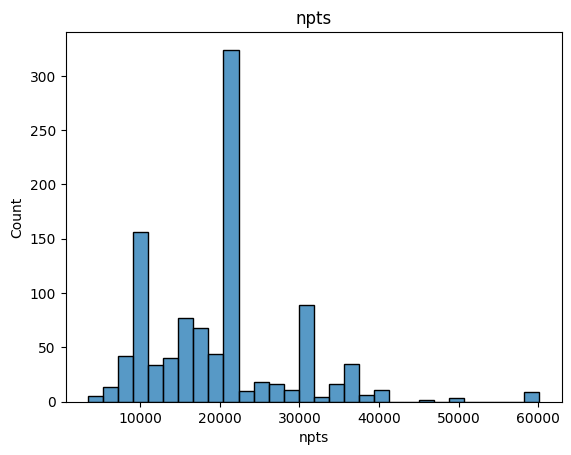

In [12]:
# Summarize the npts
num_summary(df, 'npts', plot=True, bins=30)

In [ ]:
# Plot the earhquake locations on the map
color_scale = [(0, 'green'), (0.3, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        hover_data=['xM', 'earthquake_code'],
                        color='xM',
                        color_continuous_scale=color_scale,
                        size='xM',
                        zoom=8,
                        height=500,
                        width=1200)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})
print('Earthquake Locations and Magnitudes')
fig.show()

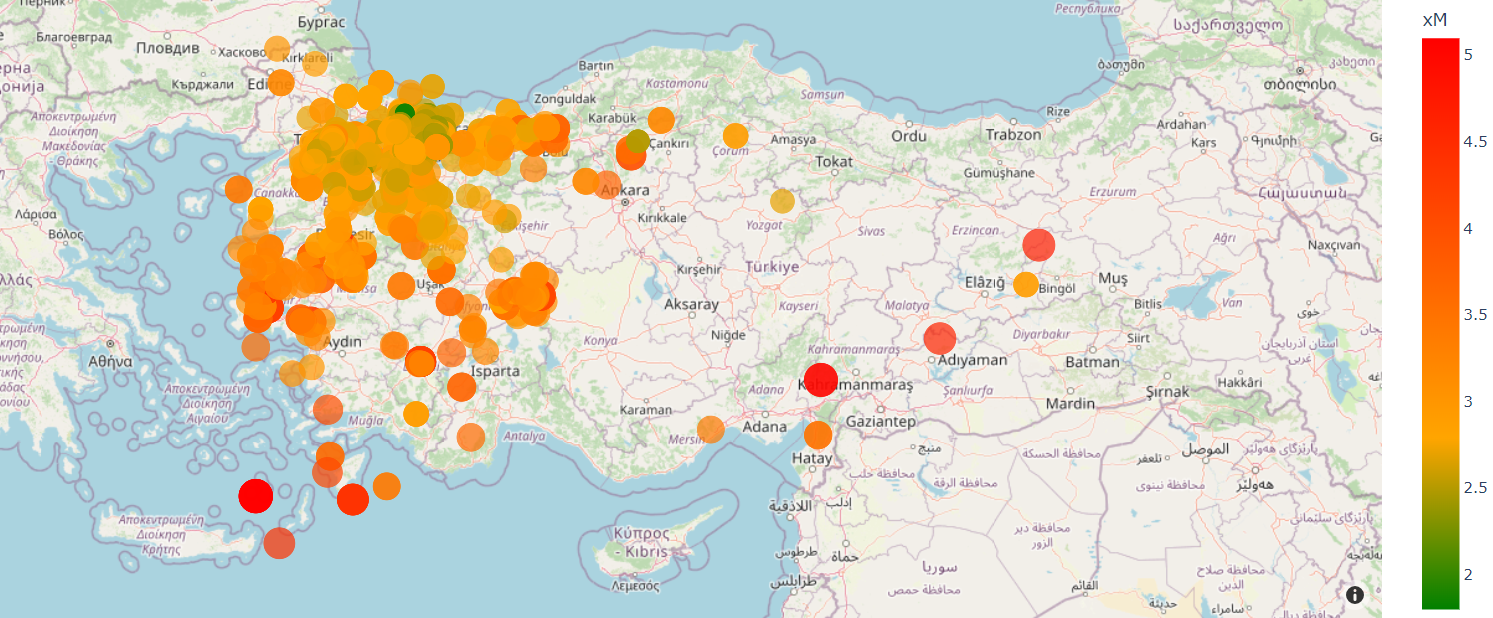

DEPTH
count    1034.000000
mean        9.525145
std         6.015135
min         1.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         7.000000
50%         8.000000
60%        10.000000
70%        10.000000
80%        13.000000
90%        17.700000
max        77.000000
Name: depth, dtype: float64


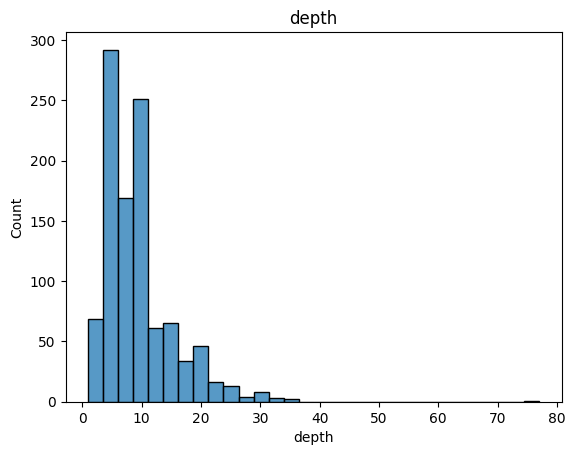

In [14]:
# Summarize the depth
num_summary(df, 'npts', plot=True, bins=30)

In [ ]:
# Plot the earhquakes depth on the map
color_scale = [(0, 'green'), (0.3, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        hover_name='depth',
                        hover_data=['depth', 'earthquake_code'],
                        color='depth',
                        color_continuous_scale=color_scale,
                        size='depth',
                        zoom=8,
                        height=500,
                        width=1200)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

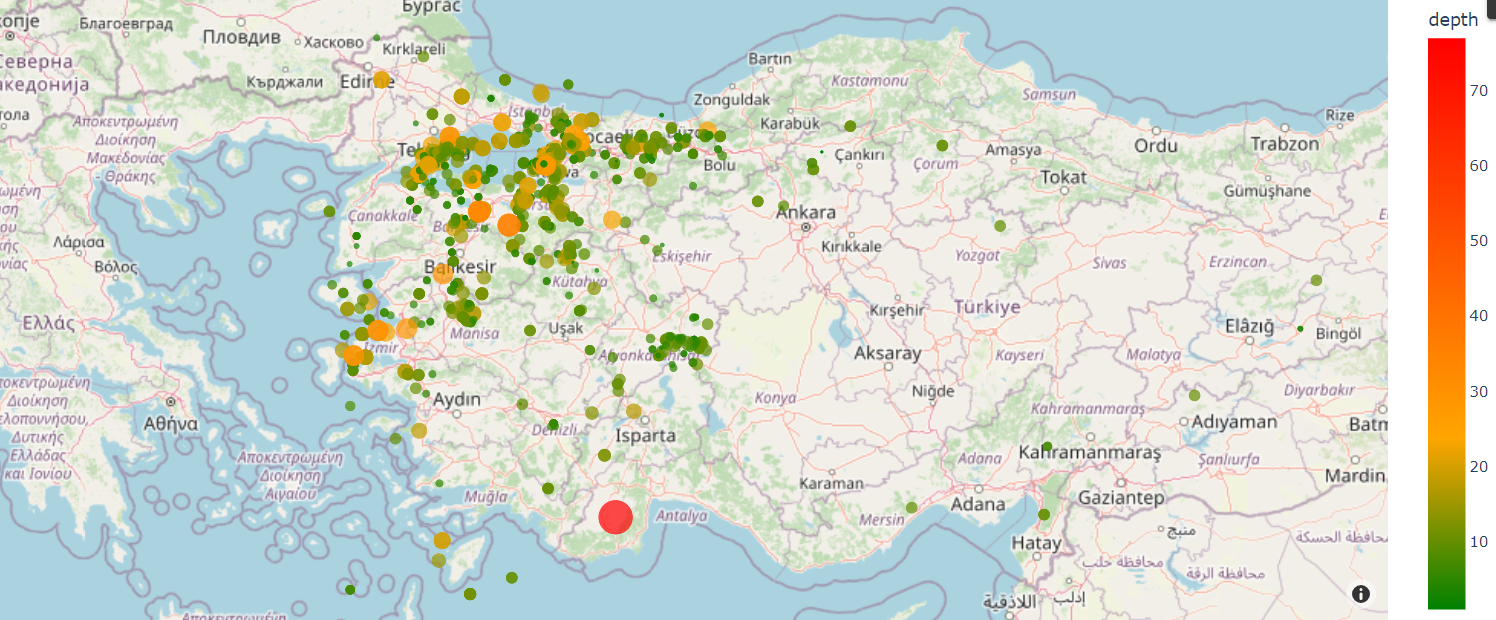

XM
count    1034.000000
mean        3.013153
std         0.461133
min         1.800000
10%         2.600000
20%         2.700000
30%         2.800000
40%         2.800000
50%         2.900000
60%         3.000000
70%         3.100000
80%         3.300000
90%         3.600000
max         5.100000
Name: xM, dtype: float64


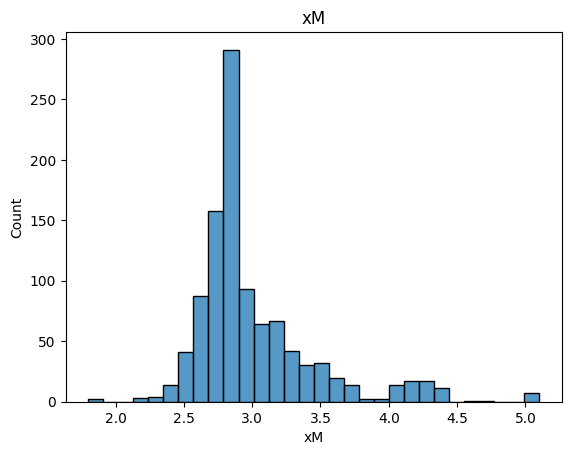

In [16]:
# Summarize the magnitudes
num_summary(df, 'xM', plot=True, bins=30)

In [24]:
# Create a new column for distribution of magnitude
df.loc[df['xM']<2, 'magnitude'] = 'Magnitude < 2'
df.loc[(df['xM']>=2) & (df['xM']<3), 'magnitude'] = '3 > Magnitude >= 2'
df.loc[(df['xM']>=3) & (df['xM']<4), 'magnitude'] = '4 > Magnitude >= 3'
df.loc[(df['xM']>=4) & (df['xM']<5), 'magnitude'] = '5 > Magnitude >= 4'
df.loc[df['xM']>5, 'magnitude'] = 'Magnitude > 5'

In [25]:
# Check the dataframe
df.head()

,network,station,channel,start-time,end-time,sampling-rate,npts,date_time,earthquake_code,latitude,longitude,depth,xM,MD,ML,Ms,Mb,location,magnitude
0,KO,YLVX,BHE,2002-05-01T10:45:00.004000Z,2002-05-01T10:49:59.974000Z,100.0,29998,2002-05-01 10:45:00.004,20020501104538,38.62,30.99,7,3.4,3.4,0.0,0.0,0.0,CUMHURIYET-CAY (AFYONKARAHISAR) [North East 4...,4 > Magnitude >= 3
1,KO,YLVX,BHE,2002-05-04T23:26:00.004000Z,2002-05-04T23:35:59.974000Z,100.0,59998,2002-05-04 23:26:00.004,20020504232625,40.78,30.86,9,3.1,3.1,0.0,0.0,0.0,YESILYAYLA-GUMUSOVA (DUZCE) [South West 2.1 km],4 > Magnitude >= 3
2,KO,BALB,BHE,2002-05-05T09:21:00.000000Z,2002-05-05T09:31:07.980000Z,50.0,30400,2002-05-05 09:21:00.000,20020505092209,40.53,28.32,7,4.1,3.9,4.1,0.0,0.0,MARMARA DENIZI,5 > Magnitude >= 4
3,KO,CTTX,BHE,2002-05-05T09:21:00.004000Z,2002-05-05T09:30:59.964000Z,100.0,59997,2002-05-05 09:21:00.004,20020505092209,40.53,28.32,7,4.1,3.9,4.1,0.0,0.0,MARMARA DENIZI,5 > Magnitude >= 4
4,KO,ISKB,BHE,2002-05-05T09:20:54.000000Z,2002-05-05T09:31:01.980000Z,50.0,30400,2002-05-05 09:20:54.000,20020505092209,40.53,28.32,7,4.1,3.9,4.1,0.0,0.0,MARMARA DENIZI,5 > Magnitude >= 4


In [41]:
# Check the distribution of magnitude with our new column
pd.DataFrame({
    'Magnitude': df['magnitude'].value_counts(),
    'Ratio(%)': round((df['magnitude'].value_counts() / len(df)) * 100, 2)
})

,Magnitude,Ratio(%)
3 > Magnitude >= 2,598,57.83
4 > Magnitude >= 3,366,35.40
5 > Magnitude >= 4,61,5.90
Magnitude > 5,5,0.48
Magnitude < 2,2,0.19


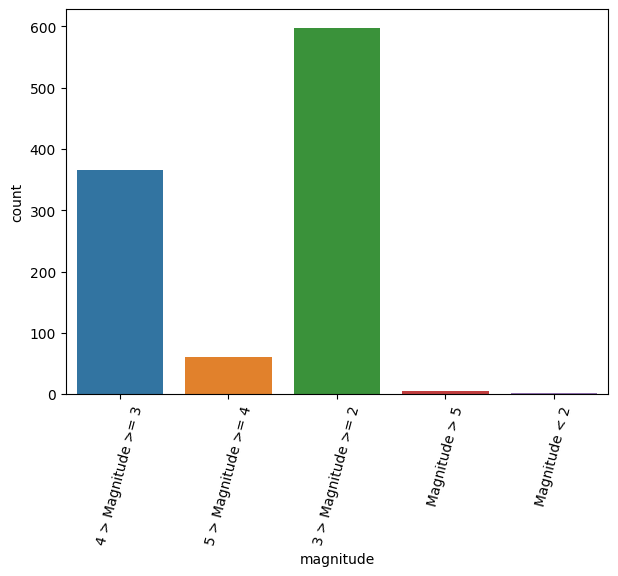

In [43]:
# Plot the distribution
plt.figure(figsize=(7, 5))
sns.countplot(df, x='magnitude')
plt.xticks(rotation=75)
plt.show()

In [48]:
# How many unique location we have?
df['location'].nunique()

433